In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from crea_visualizza_istanza import *
from controlli_ammissibilita import *
from greedy import *
from local_search import *
from greedy_rand import *
from grasp import *
from tabu_search import *
from iterated_local_search import *
from visualizza_grafici import *
from clark_wright import *
import os



delta_small = 1.5
G_small, residui_dict_small = generate_instance(num_bambini=100, pos_min=20, pos_max=50, seed=10, delta= delta_small)
#plot_graph(G_small, 'grafo_dim_ridotte.png')
img = 'images/small/'
os.makedirs(img, exist_ok=True)


#Stampo i nodi e le relative posizioni
for node, data in G_small.nodes(data=True):
    print(f"Nodo: {node}, Posizione: {data['pos']}, Massima Distanza: {data['max_distance']}")

#print("\n")

#Stampo gli archi e i relativi pesi
#for u, v, data in G_small.edges(data=True):
#    print(f"Arco: {u} - {v}, Peso: {data['weight']}")

subsequentNN = []
schoolNN = []
ls_subsequentNN = []
ls_schoolNN = []
grasp_subsequentNN = []
grasp_schoolNN = []
tabu_subsequentNN = []
tabu_schoolNN = []
Ils_subsequentNN = []
Ils_schoolNN = []
grasp_bI = []
tabu_bI = []
ils_bI = []
grasp_fI = []
tabu_fI = []
ils_fI = []
times_small = []




Nodo: Bambino_1, Posizione: [43.1396193  20.62255848], Massima Distanza: 34.5
Nodo: Bambino_2, Posizione: [39.00944705 42.46411648], Massima Distanza: 9.0
Nodo: Bambino_3, Posizione: [34.95521037 26.74389937], Massima Distanza: 30.0
Nodo: Bambino_4, Posizione: [25.94188594 42.81592137], Massima Distanza: 28.5
Nodo: Bambino_5, Posizione: [25.0733251  22.65019443], Massima Distanza: 43.5
Nodo: Bambino_6, Posizione: [40.56079455 48.60180039], Massima Distanza: 10.5
Nodo: Bambino_7, Posizione: [20.11844799 35.3657679 ], Massima Distanza: 39.0
Nodo: Bambino_8, Posizione: [44.37862885 38.375782  ], Massima Distanza: 9.0
Nodo: Bambino_9, Posizione: [41.65265952 28.75628205], Massima Distanza: 24.0
Nodo: Bambino_10, Posizione: [47.53322368 41.4372735 ], Massima Distanza: 6.0
Nodo: Bambino_11, Posizione: [36.27633104 24.26510143], Massima Distanza: 31.5
Nodo: Bambino_12, Posizione: [31.2002228  40.22400845], Massima Distanza: 21.0
Nodo: Bambino_13, Posizione: [33.25499523 33.0204198 ], Massima 

# Greedy small

In [3]:
(percorsi_sub_NN, sub_NN_obj_val, residui_dict_small_sub_NN), time = subsequent_nearest_neighbour(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {sub_NN_obj_val}")
check_solution(percorsi_sub_NN, G_small, delta_small)
subsequentNN.append(sub_NN_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.008242
Funzione obiettivo: 1200450
Soluzione ammissibile.


In [4]:
(percorsi_sch_NN, sch_NN_obj_val, residui_dict_small_sch_NN), time = school_nearest_neighbour(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_sch_NN)
print(f"Funzione obiettivo: {sch_NN_obj_val}")
check_solution(percorsi_sch_NN, G_small, delta_small)
schoolNN.append(sch_NN_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.001895
Funzione obiettivo: 1500493
Soluzione ammissibile.


In [5]:
(percorsi_sub_NN_R, sub_NN_R_obj_val, residui_dict_small_sub_NN_R), time = subsequent_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
print(f"Funzione obiettivo: {sub_NN_R_obj_val}")
check_solution(percorsi_sub_NN_R, G_small, delta_small)
subsequentNN.append(sub_NN_R_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.008539
Funzione obiettivo: 1800611
Soluzione ammissibile.


In [6]:
(percorsi_sch_NN_R, sch_NN_R_obj_val, residui_dict_small_sch_NN_R), time = school_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
print(f"Funzione obiettivo: {sch_NN_R_obj_val}")
check_solution(percorsi_sch_NN_R, G_small, delta_small)
schoolNN.append(sch_NN_R_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.001755
Funzione obiettivo: 1600573
Soluzione ammissibile.


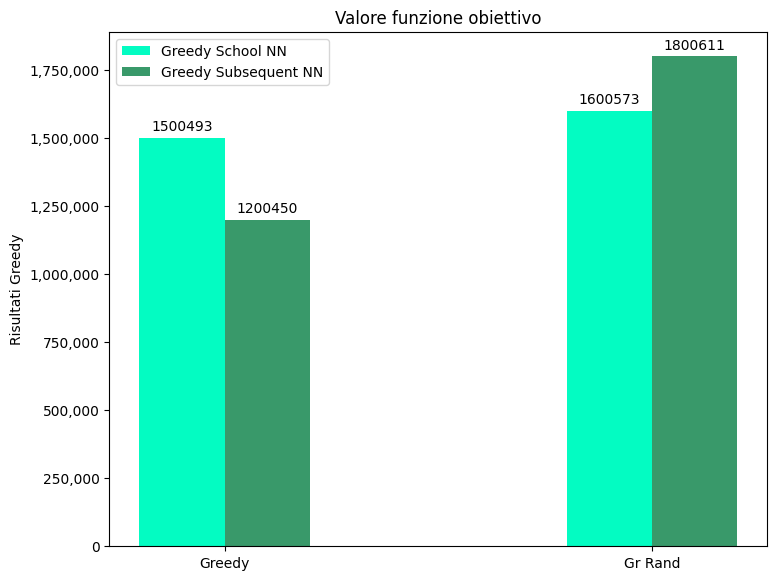

In [7]:
plotSubSchResults(subsequentNN, schoolNN, "Greedy", img + 'greedy_small.png')

# Local Search small

In [8]:
#percorsi_cw, cw_obj_val, residui_dict_small_cw = clark_wright(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_cw)
#print(f"Funzione obiettivo: {cw_obj_val}")
#check_solution(percorsi_cw, G_small, delta_small)
#ls_subsequentNN.append(cw_obj_val)

#percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_sub_ls_bI = local_search_bI(G_small, residui_dict_small_cw, percorsi_cw, cw_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_bI)
#print(f"Funzione obiettivo: {ls_bI_obj_val}")
#check_solution(percorsi_ls_bI, G_small, delta_small)
#ls_subsequentNN.append(ls_bI_obj_val)

In [9]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_sub_ls_bI), time = local_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_subsequentNN.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.015078
Funzione obiettivo: 1200450
Soluzione ammissibile.


In [10]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_ls_sch_bI), time = local_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_schoolNN.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.028152
Funzione obiettivo: 1500493
Soluzione ammissibile.


In [11]:
(percorsi_sub_ls_fI, sub_ls_fI_obj_val, residui_dict_small_sub_ls_fI), time = local_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {sub_ls_fI_obj_val}")
check_solution(percorsi_sub_ls_fI, G_small, delta_small)
ls_subsequentNN.append(sub_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.016075
Funzione obiettivo: 1200449
Soluzione ammissibile.


In [12]:
(percorsi_sch_ls_fI, sch_ls_fI_obj_val, residui_dict_small_sch_ls_fI), time = local_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {sch_ls_fI_obj_val}")
check_solution(percorsi_sch_ls_fI, G_small, delta_small)
ls_schoolNN.append(sch_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.044404
Funzione obiettivo: 1500487
Soluzione ammissibile.


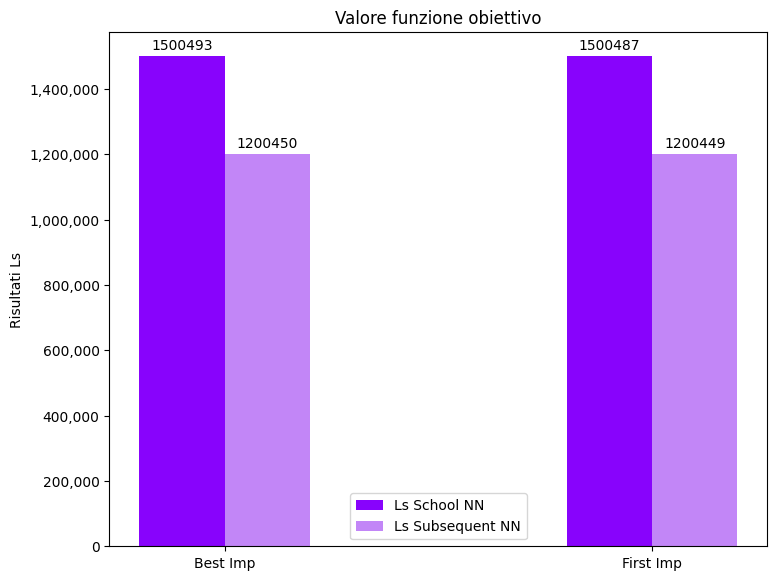

In [13]:
plotSubSchResults(ls_subsequentNN, ls_schoolNN, 'Ls', img + 'ls_small.png')

# GRASP small

1
Tempo impiegato: 00:00:0.008752
Tempo impiegato: 00:00:0.018316
2
Tempo impiegato: 00:00:0.008669
Tempo impiegato: 00:00:0.068305
3
Tempo impiegato: 00:00:0.008579
Tempo impiegato: 00:00:0.074376
4
Tempo impiegato: 00:00:0.008764
Tempo impiegato: 00:00:0.053415
5
Tempo impiegato: 00:00:0.008852
Tempo impiegato: 00:00:0.095688


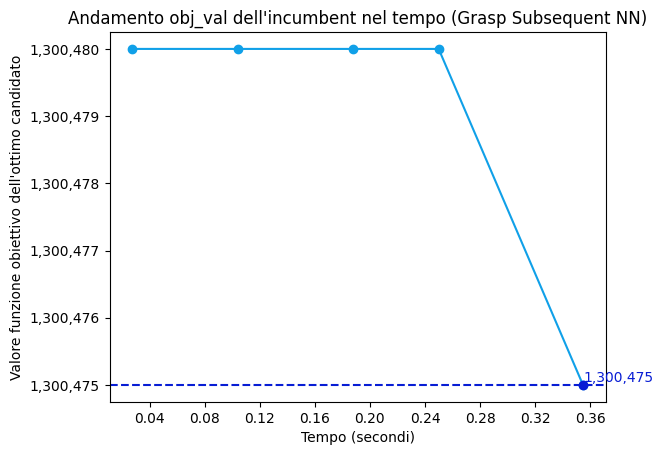

Tempo impiegato: 00:00:0.391658
Funzione obiettivo: 1300475
Soluzione ammissibile.


In [14]:
(percorsi_G_sub_NN_bI, G_sub_NN_bI_obj_val, residui_dict_small_G_sub_NN_bI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_bI", max_len=5)
print(f"Funzione obiettivo: {G_sub_NN_bI_obj_val}")
check_solution(percorsi_G_sub_NN_bI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_bI_obj_val)
grasp_bI.append(G_sub_NN_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.001737
Tempo impiegato: 00:00:0.044796
2
Tempo impiegato: 00:00:0.001661
Tempo impiegato: 00:00:0.033474
3
Tempo impiegato: 00:00:0.001747
Tempo impiegato: 00:00:0.021275
4
Tempo impiegato: 00:00:0.001724
Tempo impiegato: 00:00:0.017584
5
Tempo impiegato: 00:00:0.001676
Tempo impiegato: 00:00:0.043017


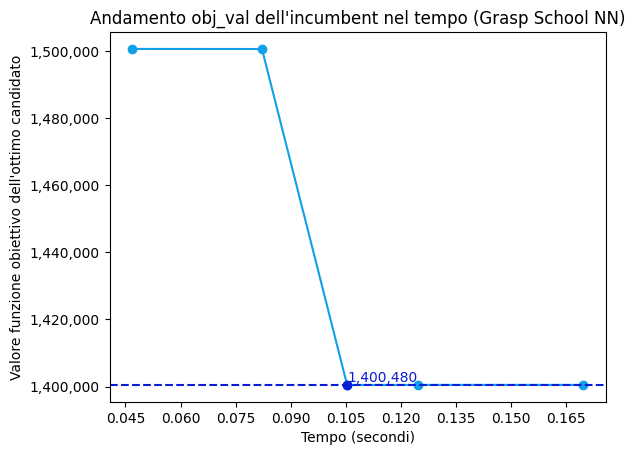

Tempo impiegato: 00:00:0.206477
Funzione obiettivo: 1400480
Soluzione ammissibile.


In [15]:
(percorsi_G_sch_bI, G_sch_bI_obj_val, residui_dict_small_G_sch_NN_bI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_bI", max_len=5)
print(f"Funzione obiettivo: {G_sch_bI_obj_val}")
check_solution(percorsi_G_sch_bI, G_small, delta_small)
grasp_schoolNN.append(G_sch_bI_obj_val)
grasp_bI.append(G_sch_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.034786
Tempo impiegato: 00:00:0.080355
2
Tempo impiegato: 00:00:0.008910
Tempo impiegato: 00:00:0.101245
3
Tempo impiegato: 00:00:0.008582
Tempo impiegato: 00:00:0.081583
4
Tempo impiegato: 00:00:0.008478
Tempo impiegato: 00:00:0.102326
5
Tempo impiegato: 00:00:0.008638
Tempo impiegato: 00:00:0.090311


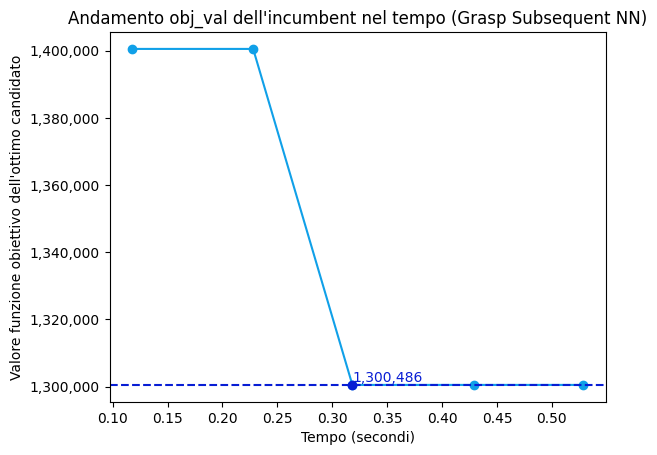

Tempo impiegato: 00:00:0.565380
Funzione obiettivo: 1300486
Soluzione ammissibile.


In [16]:
(percorsi_G_sub_NN_fI, G_sub_NN_fI_obj_val, residui_dict_small_G_sub_NN_fI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_fI", max_len=5)
print(f"Funzione obiettivo: {G_sub_NN_fI_obj_val}")
check_solution(percorsi_G_sub_NN_fI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_fI_obj_val)
grasp_fI.append(G_sub_NN_fI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.001791
Tempo impiegato: 00:00:0.037114
2
Tempo impiegato: 00:00:0.001787
Tempo impiegato: 00:00:0.040646
3
Tempo impiegato: 00:00:0.001813
Tempo impiegato: 00:00:0.076751
4
Tempo impiegato: 00:00:0.001764
Tempo impiegato: 00:00:0.038508
5
Tempo impiegato: 00:00:0.001693
Tempo impiegato: 00:00:0.028719


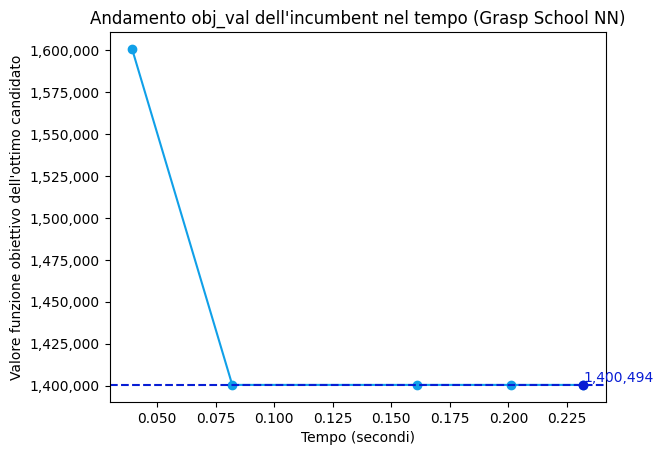

Tempo impiegato: 00:00:0.270781
Funzione obiettivo: 1400494
Soluzione ammissibile.


In [17]:
(percorsi_G_sch_fI, G_sch_fI_obj_val, residui_dict_small_G_sch_NN_fI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_fI", max_len=5)
print(f"Funzione obiettivo: {G_sch_fI_obj_val}")
check_solution(percorsi_G_sch_fI, G_small, delta_small)
grasp_schoolNN.append(G_sch_fI_obj_val)
grasp_fI.append(G_sch_fI_obj_val)
times_small.append(time)

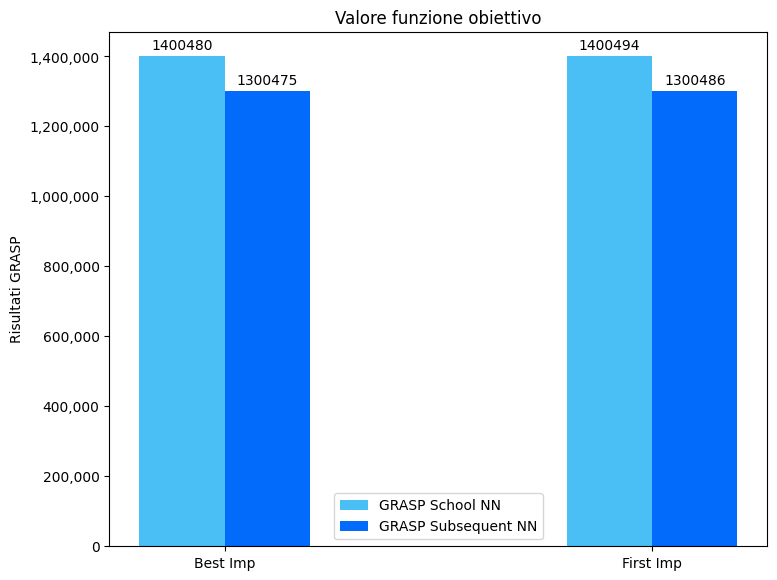

In [18]:

plotSubSchResults(grasp_subsequentNN, grasp_schoolNN, 'GRASP', img + 'grasp_small.png')


# Tabu Search small

Iterazione: 0, Non migliorato: 0, Current OV: 1200450, Best OV: 1200450
Iterazione: 1, Non migliorato: 0, Current OV: 1200449, Best OV: 1200449
Iterazione: 2, Non migliorato: 1, Current OV: 1200449, Best OV: 1200449
Iterazione: 3, Non migliorato: 2, Current OV: 1200449, Best OV: 1200449
Iterazione: 4, Non migliorato: 3, Current OV: 1200449, Best OV: 1200449
Iterazione: 5, Non migliorato: 4, Current OV: 1200449, Best OV: 1200449
Iterazione: 6, Non migliorato: 5, Current OV: 1200449, Best OV: 1200449
Iterazione: 7, Non migliorato: 6, Current OV: 1200449, Best OV: 1200449
Iterazione: 8, Non migliorato: 7, Current OV: 1200449, Best OV: 1200449
Iterazione: 9, Non migliorato: 8, Current OV: 1200449, Best OV: 1200449
Iterazione: 10, Non migliorato: 9, Current OV: 1200449, Best OV: 1200449
Iterazione: 11, Non migliorato: 10, Current OV: 1200449, Best OV: 1200449
Iterazione: 12, Non migliorato: 0, Current OV: 1200445, Best OV: 1200445
Iterazione: 13, Non migliorato: 0, Current OV: 1200444, Best

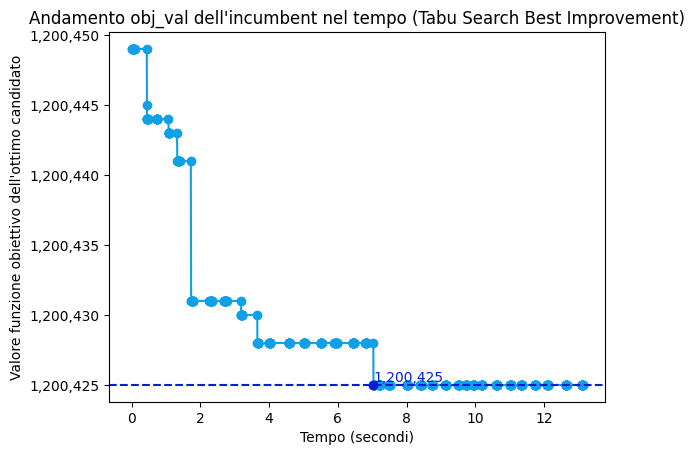

Tempo impiegato: 00:00:13.161480
Funzione obiettivo: 1200425
Soluzione ammissibile.


In [19]:
(percorsi_tabu_sub, tabu_sub_obj_val, residui_dict_small_tabu_sub), time = tabu_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sub_obj_val}")
check_solution(percorsi_tabu_sub, G_small, delta_small)
tabu_subsequentNN.append(tabu_sub_obj_val)
tabu_bI.append(tabu_sub_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 1200450, Best OV: 1200450
Iterazione: 1, Non migliorato: 0, Current OV: 1200449, Best OV: 1200449
Iterazione: 2, Non migliorato: 1, Current OV: 1200449, Best OV: 1200449
Iterazione: 3, Non migliorato: 2, Current OV: 1200449, Best OV: 1200449
Iterazione: 4, Non migliorato: 3, Current OV: 1200449, Best OV: 1200449
Iterazione: 5, Non migliorato: 4, Current OV: 1200449, Best OV: 1200449
Iterazione: 6, Non migliorato: 5, Current OV: 1200449, Best OV: 1200449
Iterazione: 7, Non migliorato: 6, Current OV: 1200449, Best OV: 1200449
Iterazione: 8, Non migliorato: 7, Current OV: 1200449, Best OV: 1200449
Iterazione: 9, Non migliorato: 8, Current OV: 1200449, Best OV: 1200449
Iterazione: 10, Non migliorato: 9, Current OV: 1200449, Best OV: 1200449
Iterazione: 11, Non migliorato: 10, Current OV: 1200449, Best OV: 1200449
Iterazione: 12, Non migliorato: 0, Current OV: 1200442, Best OV: 1200442
Iterazione: 13, Non migliorato: 0, Current OV: 1200441, Best

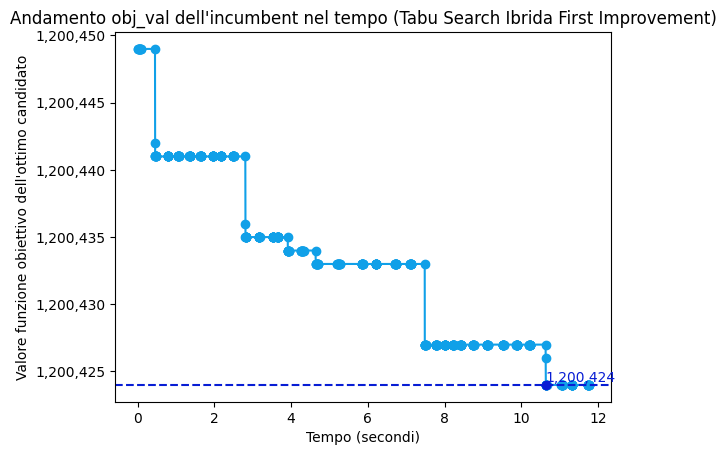

Tempo impiegato: 00:00:11.817226
Funzione obiettivo: 1200424
Soluzione ammissibile.


In [20]:
(percorsi_tabu_sub_fI, tabu_sub_fI_obj_val, residui_dict_small_tabu_sub_fI), time = tabu_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sub_fI_obj_val}")
check_solution(percorsi_tabu_sub_fI, G_small, delta_small)
tabu_subsequentNN.append(tabu_sub_fI_obj_val)
tabu_fI.append(tabu_sub_fI_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 1500493, Best OV: 1500493
Iterazione: 1, Non migliorato: 0, Current OV: 1500491, Best OV: 1500491
Iterazione: 2, Non migliorato: 0, Current OV: 1500489, Best OV: 1500489
Iterazione: 3, Non migliorato: 0, Current OV: 1500488, Best OV: 1500488
Iterazione: 4, Non migliorato: 0, Current OV: 1500487, Best OV: 1500487
Iterazione: 5, Non migliorato: 1, Current OV: 1500487, Best OV: 1500487
Iterazione: 6, Non migliorato: 2, Current OV: 1500487, Best OV: 1500487
Iterazione: 7, Non migliorato: 3, Current OV: 1500487, Best OV: 1500487
Iterazione: 8, Non migliorato: 4, Current OV: 1500487, Best OV: 1500487
Iterazione: 9, Non migliorato: 5, Current OV: 1500487, Best OV: 1500487
Iterazione: 10, Non migliorato: 6, Current OV: 1500487, Best OV: 1500487
Iterazione: 11, Non migliorato: 7, Current OV: 1500487, Best OV: 1500487
Iterazione: 12, Non migliorato: 0, Current OV: 1500484, Best OV: 1500484
Iterazione: 13, Non migliorato: 1, Current OV: 1500484, Best 

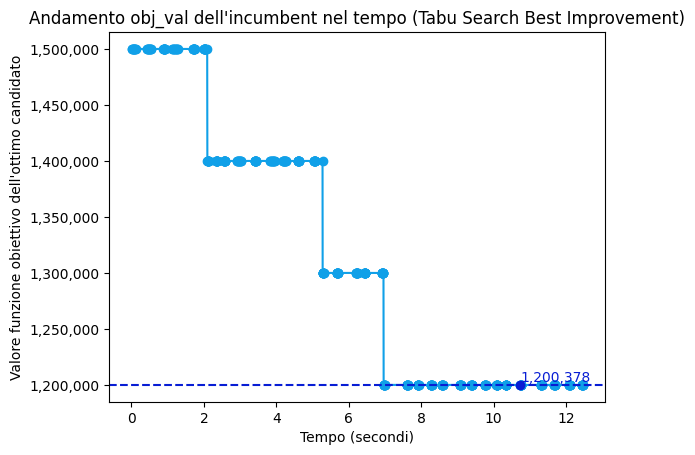

Tempo impiegato: 00:00:12.500886
Funzione obiettivo: 1200378
Soluzione ammissibile.


In [21]:
(percorsi_tabu_sch, tabu_sch_obj_val, residui_dict_small_tabu_sch), time = tabu_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sch_obj_val}")
check_solution(percorsi_tabu_sch, G_small, delta_small)
tabu_schoolNN.append(tabu_sch_obj_val)
tabu_bI.append(tabu_sch_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 1500493, Best OV: 1500493
Iterazione: 1, Non migliorato: 0, Current OV: 1500492, Best OV: 1500492
Iterazione: 2, Non migliorato: 0, Current OV: 1500491, Best OV: 1500491
Iterazione: 3, Non migliorato: 0, Current OV: 1500489, Best OV: 1500489
Iterazione: 4, Non migliorato: 0, Current OV: 1500487, Best OV: 1500487
Iterazione: 5, Non migliorato: 1, Current OV: 1500487, Best OV: 1500487
Iterazione: 6, Non migliorato: 2, Current OV: 1500487, Best OV: 1500487
Iterazione: 7, Non migliorato: 3, Current OV: 1500487, Best OV: 1500487
Iterazione: 8, Non migliorato: 4, Current OV: 1500487, Best OV: 1500487
Iterazione: 9, Non migliorato: 5, Current OV: 1500487, Best OV: 1500487
Iterazione: 10, Non migliorato: 6, Current OV: 1500487, Best OV: 1500487
Iterazione: 11, Non migliorato: 7, Current OV: 1500487, Best OV: 1500487
Iterazione: 12, Non migliorato: 0, Current OV: 1500484, Best OV: 1500484
Iterazione: 13, Non migliorato: 1, Current OV: 1500484, Best 

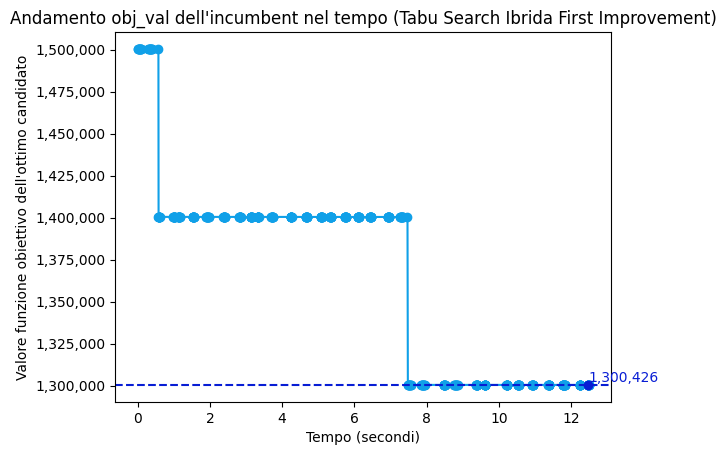

Tempo impiegato: 00:00:12.533120
Funzione obiettivo: 1300426
Soluzione ammissibile.


In [22]:
(percorsi_tabu_sch_fI, tabu_sch_fI_obj_val, residui_dict_small_tabu_sch_fI), time = tabu_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sch_fI_obj_val}")
check_solution(percorsi_tabu_sch_fI, G_small, delta_small)
tabu_schoolNN.append(tabu_sch_fI_obj_val)
tabu_fI.append(tabu_sch_fI_obj_val)
times_small.append(time)

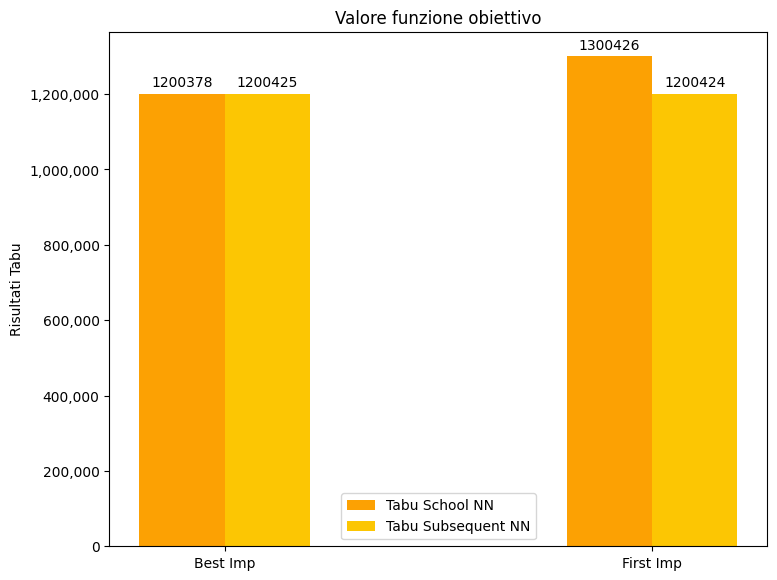

In [23]:
plotSubSchResults(tabu_subsequentNN, tabu_schoolNN, 'Tabu', img + 'tabu_small.png')

# Iterated Local Search small

Temperatura:  160
Iterazione: 0, Current OV: 1200450, Best OV: 1200450
Tempo impiegato: 00:00:0.015668
Iterazione: 0, peturbed OV: 1200445, Best OV: 1200450
Iterazione: 0, Current OV: 1200445, Best OV: 1200445
Tempo impiegato: 00:00:0.009830
Iterazione: 0, peturbed OV: 1200448, Best OV: 1200445
r : 0.2556899394479589 soglia:  0.9814246877477771
Iterazione: 0, Current OV: 1200448, Best OV: 1200445
Tempo impiegato: 00:00:0.016155
Iterazione: 0, peturbed OV: 1200450, Best OV: 1200445
r : 0.7190294209981162 soglia:  0.9875778004938814
Iterazione: 0, Current OV: 1200450, Best OV: 1200445
Tempo impiegato: 00:00:0.016913
Iterazione: 0, peturbed OV: 1200441, Best OV: 1200445
Iterazione: 0, Current OV: 1200441, Best OV: 1200441
Tempo impiegato: 00:00:0.011629
Iterazione: 0, peturbed OV: 1200441, Best OV: 1200441
r : 0.9761322975235022 soglia:  1.0
Iterazione: 0, Current OV: 1200441, Best OV: 1200441
Tempo impiegato: 00:00:0.011317
Iterazione: 0, peturbed OV: 1200445, Best OV: 1200441
r : 0.6111

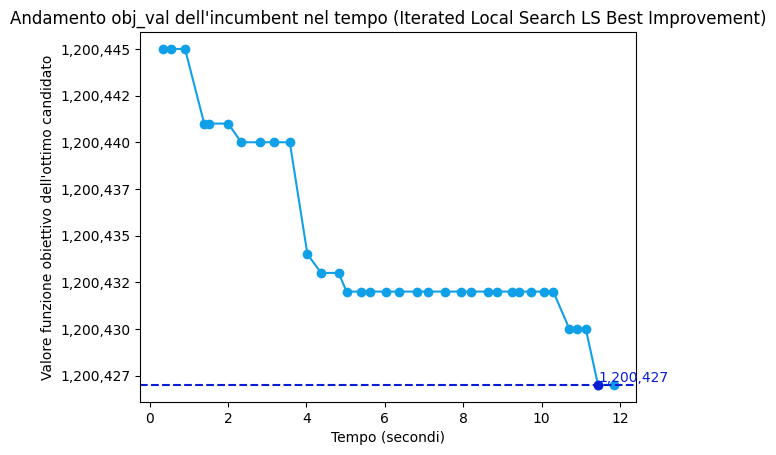

Tempo impiegato: 00:00:11.875142
Funzione obiettivo: 1200427
Soluzione ammissibile.


In [24]:
(percorsi_ILS_sub_bI, ILS_sub_bI_obj_val, residui_dict_small_ILS_sub_bI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_bI")
print(f"Funzione obiettivo: {ILS_sub_bI_obj_val}")
check_solution(percorsi_ILS_sub_bI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_bI_obj_val)
ils_bI.append(ILS_sub_bI_obj_val)
times_small.append(time)

Temperatura:  160
Iterazione: 0, Current OV: 1200450, Best OV: 1200450
Tempo impiegato: 00:00:0.019289
Iterazione: 0, peturbed OV: 1200445, Best OV: 1200450
Iterazione: 0, Current OV: 1200445, Best OV: 1200445
Tempo impiegato: 00:00:0.015215
Iterazione: 0, peturbed OV: 1200443, Best OV: 1200445
Iterazione: 0, Current OV: 1200443, Best OV: 1200443
Tempo impiegato: 00:00:0.014769
Iterazione: 0, peturbed OV: 1200443, Best OV: 1200443
r : 0.3713913545718882 soglia:  1.0
Iterazione: 0, Current OV: 1200443, Best OV: 1200443
Tempo impiegato: 00:00:0.014509
Iterazione: 0, peturbed OV: 1200445, Best OV: 1200443
r : 0.34054438922728303 soglia:  0.9875778004938814
Iterazione: 0, Current OV: 1200445, Best OV: 1200443
Tempo impiegato: 00:00:0.014612
Iterazione: 0, peturbed OV: 1200451, Best OV: 1200443
r : 0.18609912226693737 soglia:  0.9631944177208218
Iterazione: 0, Current OV: 1200451, Best OV: 1200443
Tempo impiegato: 00:00:0.021777
Iterazione: 0, peturbed OV: 1200445, Best OV: 1200443
Iterazio

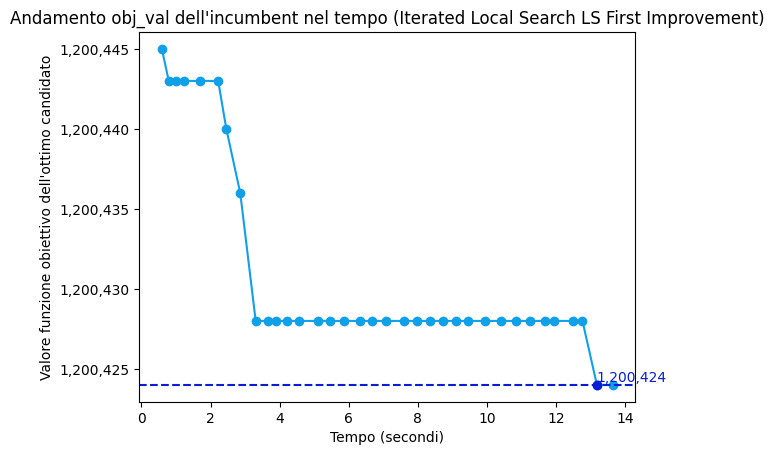

Tempo impiegato: 00:00:13.680538
Funzione obiettivo: 1200424
Soluzione ammissibile.


In [25]:
(percorsi_ILS_sub_fI, ILS_sub_fI_obj_val, residui_dict_small_ILS_sub_fI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_fI")
print(f"Funzione obiettivo: {ILS_sub_fI_obj_val}")
check_solution(percorsi_ILS_sub_fI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_fI_obj_val)
ils_fI.append(ILS_sub_fI_obj_val)
times_small.append(time)

Temperatura:  160
Iterazione: 0, Current OV: 1500493, Best OV: 1500493
Tempo impiegato: 00:00:0.029839
Iterazione: 0, peturbed OV: 1500500, Best OV: 1500493
r : 0.7623924654809704 soglia:  0.9571932258697183
Iterazione: 0, Current OV: 1500500, Best OV: 1500493
Tempo impiegato: 00:00:0.043658
Iterazione: 0, peturbed OV: 1500492, Best OV: 1500493
Iterazione: 0, Current OV: 1500492, Best OV: 1500492
Tempo impiegato: 00:00:0.036327
Iterazione: 0, peturbed OV: 1500467, Best OV: 1500492
Iterazione: 0, Current OV: 1500467, Best OV: 1500467
Tempo impiegato: 00:00:0.018955
Iterazione: 0, peturbed OV: 1500468, Best OV: 1500467
r : 0.5278645752054547 soglia:  0.9937694906233947
Iterazione: 0, Current OV: 1500468, Best OV: 1500467
Tempo impiegato: 00:00:0.026302
Iterazione: 0, peturbed OV: 1500471, Best OV: 1500467
r : 0.28586909150522577 soglia:  0.9814246877477771
Iterazione: 0, Current OV: 1500471, Best OV: 1500467
Tempo impiegato: 00:00:0.019003
Iterazione: 0, peturbed OV: 1500466, Best OV: 15

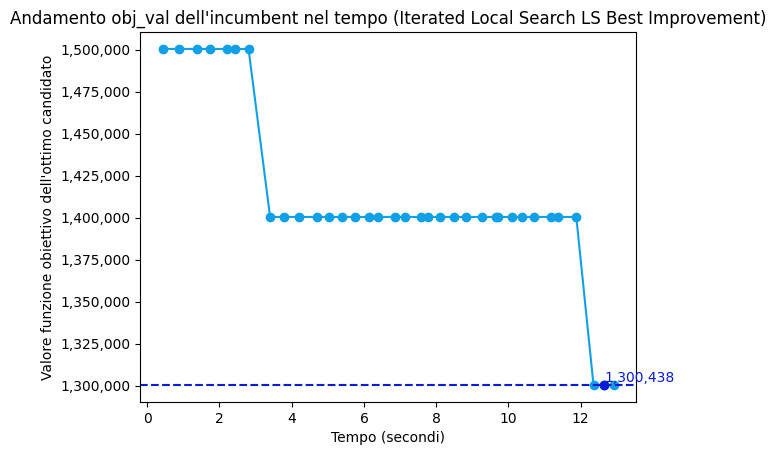

Tempo impiegato: 00:00:12.955993
Funzione obiettivo: 1300438
Soluzione ammissibile.


In [26]:
(percorsi_ILS_sch_bI, ILS_sch_bI_obj_val, residui_dict_small_ILS_sch_bI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_bI")
print(f"Funzione obiettivo: {ILS_sch_bI_obj_val}")
check_solution(percorsi_ILS_sch_bI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_bI_obj_val)
ils_bI.append(ILS_sch_bI_obj_val)
times_small.append(time)

Temperatura:  160
Iterazione: 0, Current OV: 1500493, Best OV: 1500493
Tempo impiegato: 00:00:0.049131
Iterazione: 0, peturbed OV: 1500500, Best OV: 1500493
r : 0.7014175635178344 soglia:  0.9571932258697183
Iterazione: 0, Current OV: 1500500, Best OV: 1500493
Tempo impiegato: 00:00:0.034489
Iterazione: 0, peturbed OV: 1500500, Best OV: 1500493
r : 0.2688733155757925 soglia:  1.0
Iterazione: 0, Current OV: 1500500, Best OV: 1500493
Tempo impiegato: 00:00:0.044958
Iterazione: 0, peturbed OV: 1400480, Best OV: 1500493
Iterazione: 0, Current OV: 1400480, Best OV: 1400480
Tempo impiegato: 00:00:0.015413
Iterazione: 0, peturbed OV: 1400455, Best OV: 1400480
Iterazione: 0, Current OV: 1400455, Best OV: 1400455
Tempo impiegato: 00:00:0.010221
Iterazione: 0, peturbed OV: 1400453, Best OV: 1400455
Iterazione: 0, Current OV: 1400453, Best OV: 1400453
Tempo impiegato: 00:00:0.010087
Iterazione: 0, peturbed OV: 1400453, Best OV: 1400453
r : 0.05381689774266807 soglia:  1.0
Iterazione: 0, Current O

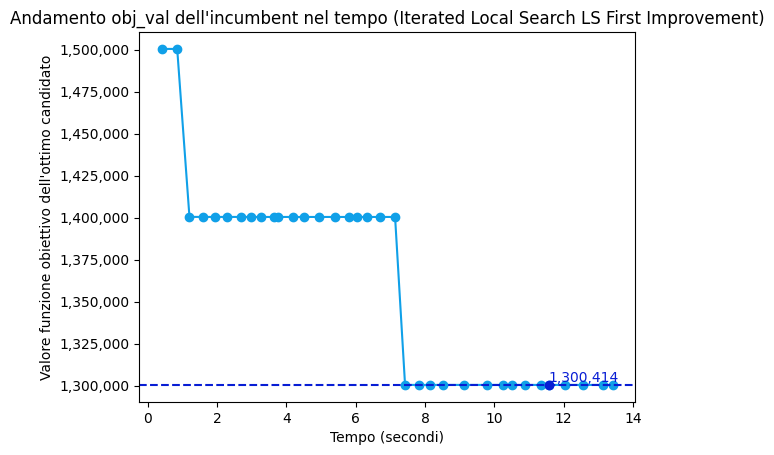

Tempo impiegato: 00:00:13.457896
Funzione obiettivo: 1300414
Soluzione ammissibile.


In [27]:
(percorsi_ILS_sch_fI, ILS_sch_fI_obj_val, residui_dict_small_ILS_sch_fI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_fI")
print(f"Funzione obiettivo: {ILS_sch_fI_obj_val}")
check_solution(percorsi_ILS_sch_fI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_fI_obj_val)
ils_fI.append(ILS_sch_fI_obj_val)
times_small.append(time)

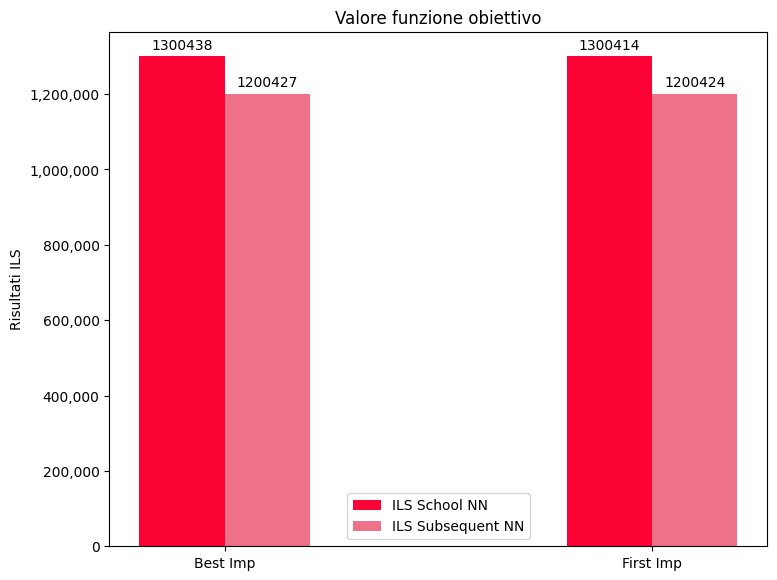

In [28]:
plotSubSchResults(Ils_subsequentNN, Ils_schoolNN, 'ILS', img + 'ils_small.png')


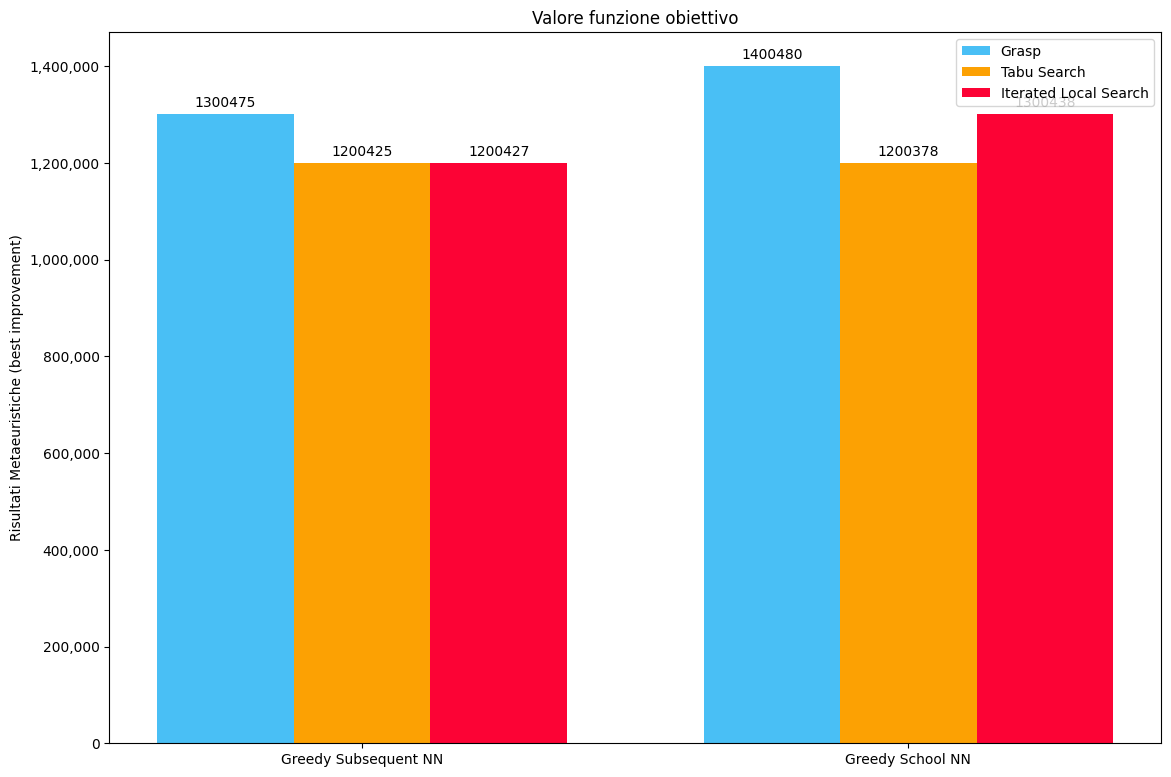

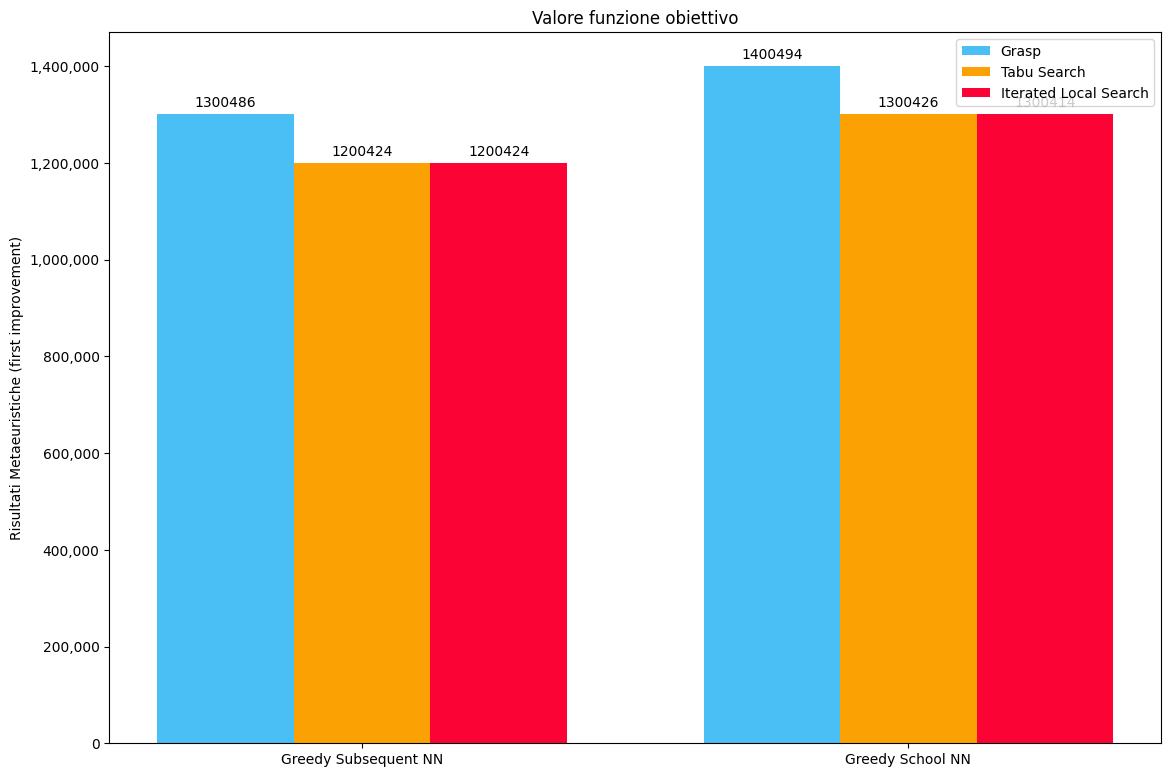

In [29]:

plotMetaheuristicsResults(grasp_bI, tabu_bI, ils_bI, img + 'metaheuristics_bI_small.png')

plotMetaheuristicsResults(grasp_fI, tabu_fI, ils_fI, img + 'metaheuristics_fI_small.png', bestImp=False)
 

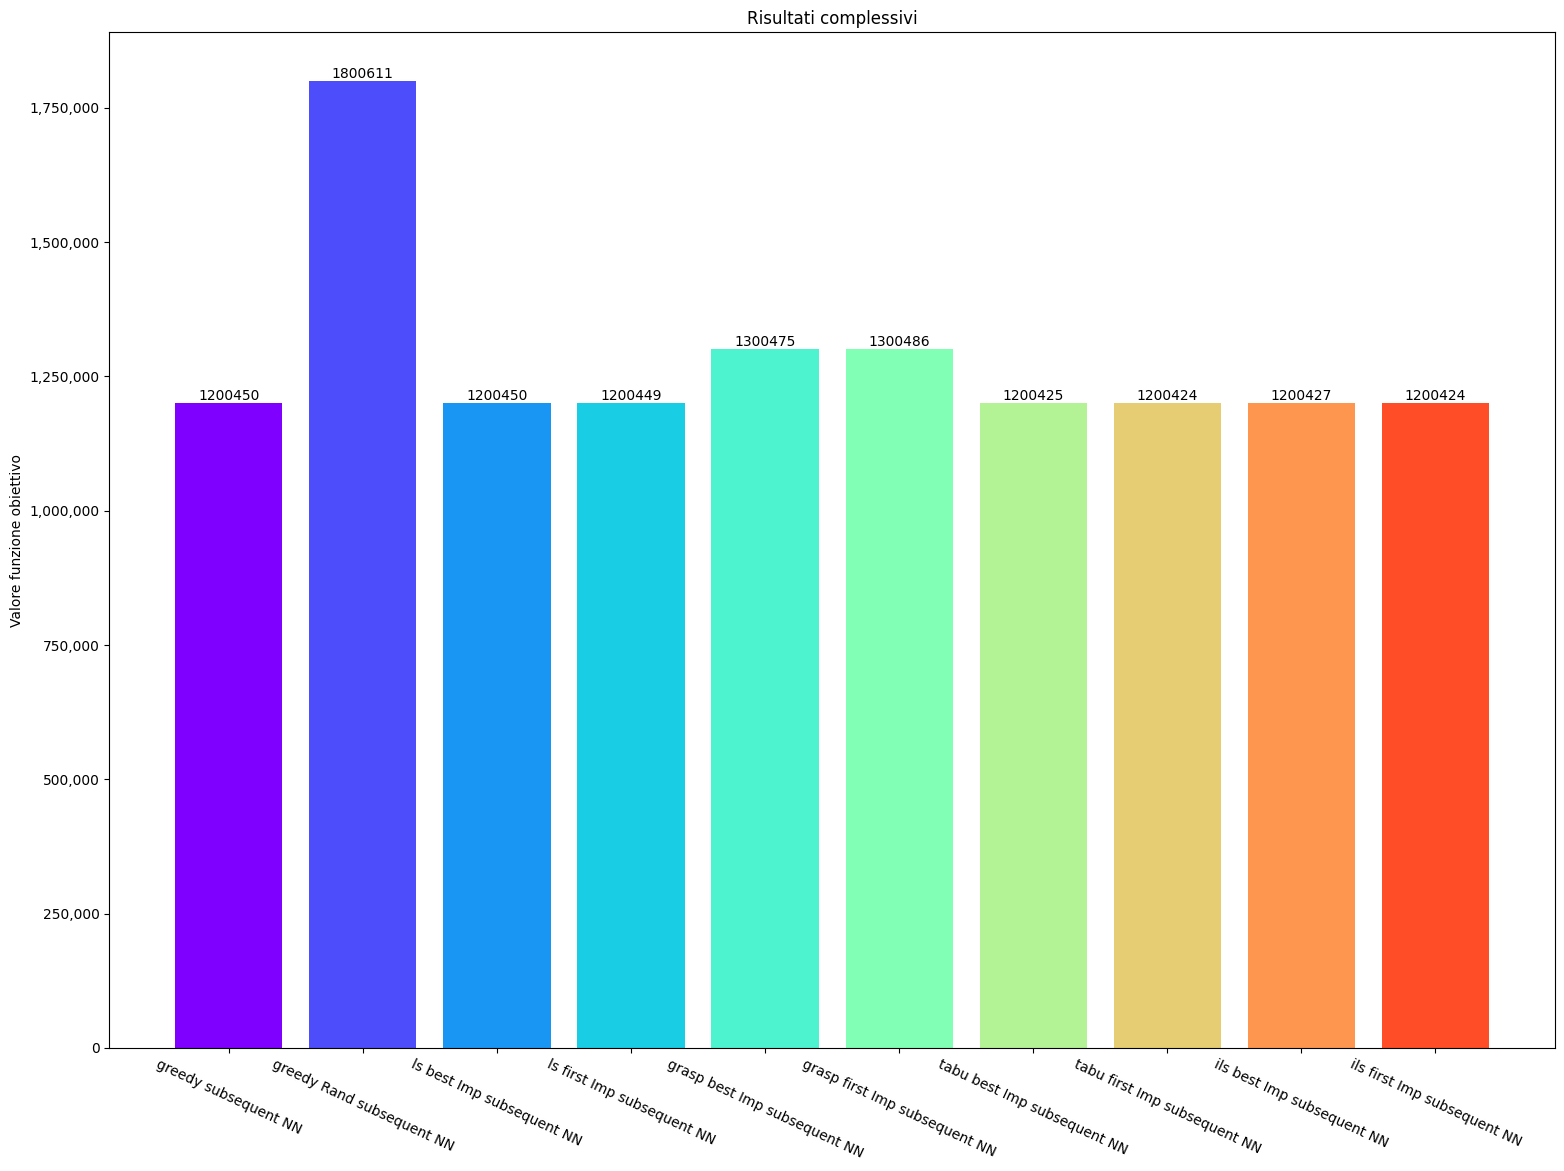

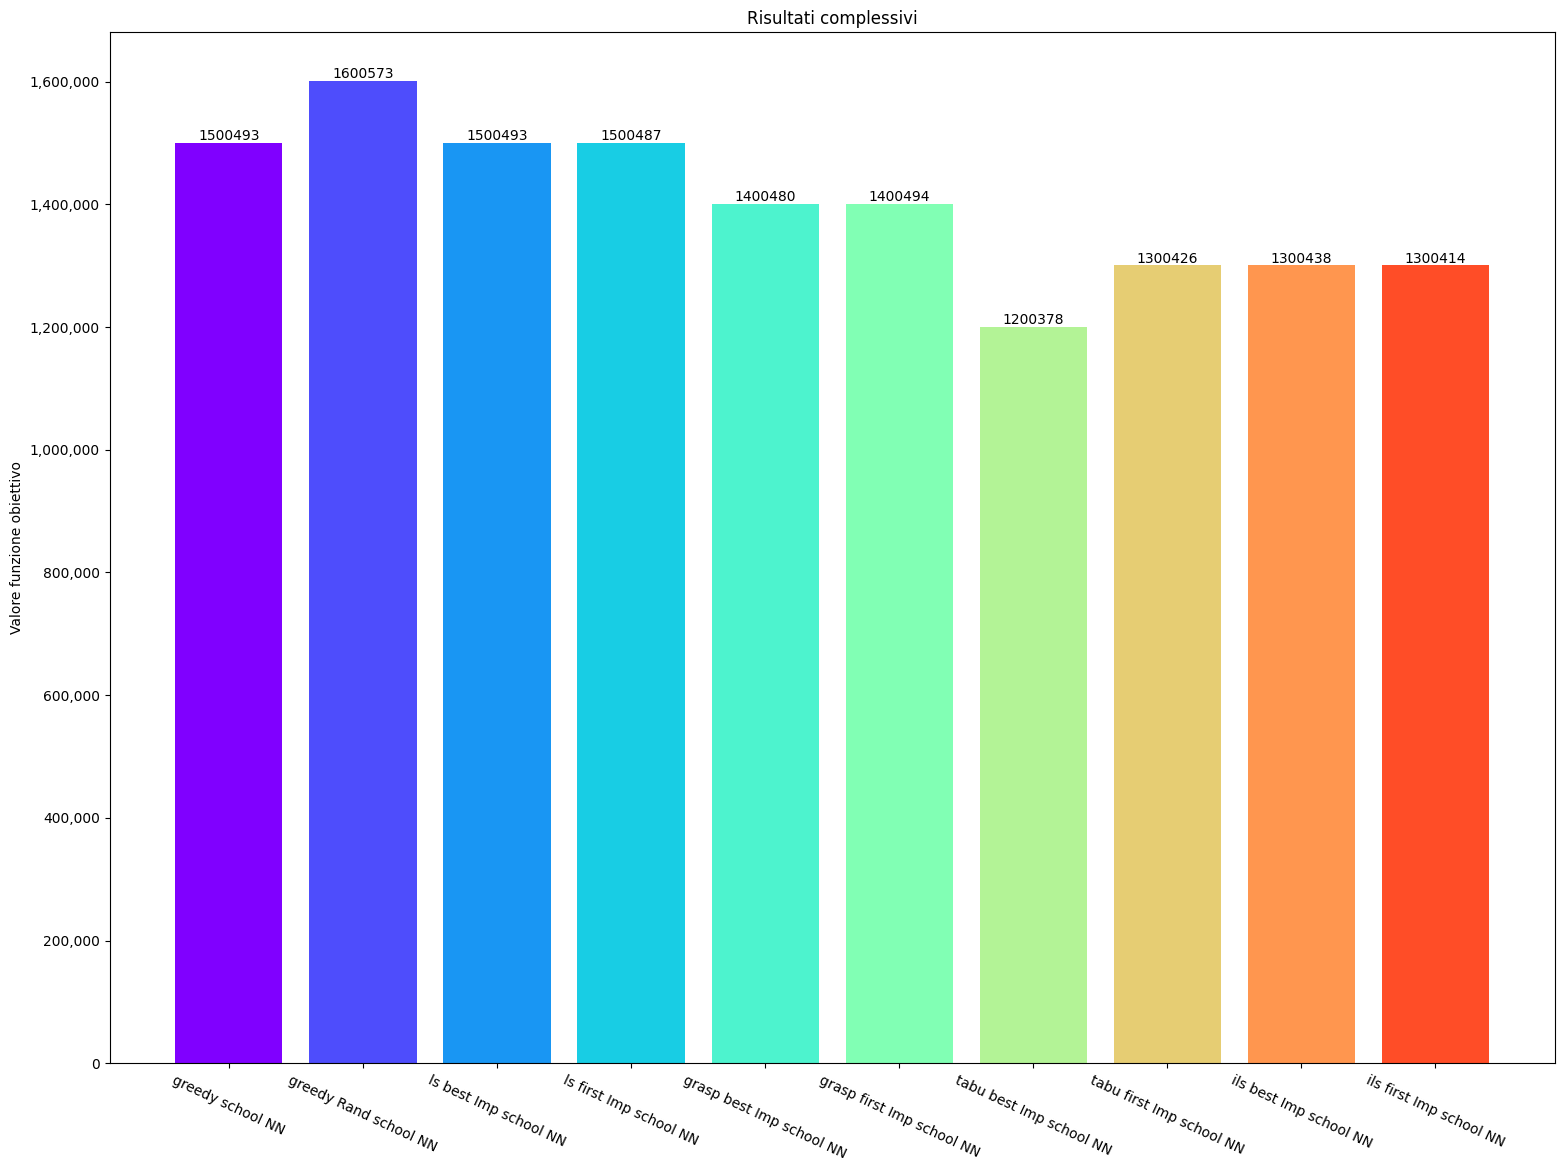

In [34]:
subsequent_results = []
school_results = []

subsequent_results.extend(subsequentNN)
subsequent_results.extend(ls_subsequentNN)
subsequent_results.extend(grasp_subsequentNN)
subsequent_results.extend(tabu_subsequentNN)
subsequent_results.extend(Ils_subsequentNN)

school_results.extend(schoolNN)
school_results.extend(ls_schoolNN)
school_results.extend(grasp_schoolNN)
school_results.extend(tabu_schoolNN)
school_results.extend(Ils_schoolNN)

plot_greedy_based_results(subsequent_results, img + 'subsequent_results_small.png', 'SubsequentNN')
plot_greedy_based_results(school_results,  img + 'school_results_small.png', 'SchoolNN')

In [ ]:
results = []
results.extend(subsequentNN)
results.extend(schoolNN)
results.extend(ls_subsequentNN)
results.extend(ls_schoolNN)
results.extend(grasp_subsequentNN)
results.extend(grasp_schoolNN)
results.extend(tabu_subsequentNN)
results.extend(tabu_schoolNN)
results.extend(Ils_subsequentNN)
results.extend(Ils_schoolNN)


In [ ]:
plot_all_results(results, img + 'all_small.png')

In [ ]:
plot_time_results(times_small, img + 'times_small.png', medium=False)